In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential, load_model
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
# from keras.utils import to_categorical
from sklearn import metrics
import h5py
from sklearn import utils
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


In [2]:
right_images = np.load('20200514_right__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')
right_labels = [[1,0] for i in np.arange(0,len(right_images))]
left_images = np.load('20200514_left__Chiral_D_Large_TIFF_Cropped_four_rows_sel_NPs_rotated.npy')
left_labels = [[0,1] for i in np.arange(0,len(left_images))]

In [3]:
split = int(len(right_labels)*0.2)

new_left_images = []
new_left_labels = []
new_right_images = []
new_right_labels = []

for img in right_images[:split]:
    new_left_images.append(img)
    new_left_labels.append([0,1])
    new_right_images.append(np.fliplr(img))
    new_right_labels.append([1,0])
for img in right_images[split:]:
    new_left_images.append(np.fliplr(img))
    new_left_labels.append([0,1])
    new_right_images.append(img)
    new_right_labels.append([1,0])
new_left_images = np.array(new_left_images)
new_right_images = np.array(new_right_images)

In [4]:
right_img_shuff, right_label_shuff = utils.shuffle(new_right_images, new_right_labels,random_state=0)
left_img_shuff, left_label_shuff = utils.shuffle(new_left_images, new_left_labels,random_state=0)

In [5]:
X_train = np.concatenate((right_img_shuff[:191],left_img_shuff[:191]),axis =0)
Y_train = np.concatenate((right_label_shuff[:191],left_label_shuff[:191]),axis = 0)
X_test = np.concatenate((right_img_shuff[191:286],left_img_shuff[191:286]),axis = 0)
Y_test = np.concatenate((right_label_shuff[191:286],left_label_shuff[191:286]),axis = 0)

In [6]:
X_train_norm = X_train/X_train.max()
X_test_norm = X_test/X_test.max()
X_train_norm = np.expand_dims(X_train_norm,axis=3)
X_test_norm = np.expand_dims(X_test_norm,axis=3)

In [7]:
X_train_shuff, Y_train_shuff = utils.shuffle(X_train_norm, Y_train,random_state=0)
X_test_shuff, Y_test_shuff = utils.shuffle(X_test_norm, Y_test,random_state=0)

In [8]:
batch_size = 20
seed = 42
train_datagen = ImageDataGenerator(
        rotation_range = 10,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=False,
        vertical_flip = False)

test_datagen = ImageDataGenerator(rescale=1.)

train_generator = train_datagen.flow(X_train_shuff, y=Y_train_shuff, batch_size=batch_size,seed=seed)
val_generator = test_datagen.flow(X_test_shuff,y=Y_test_shuff,batch_size=batch_size,seed=seed)

In [24]:
del modelE
clear_session()

In [25]:
modelE = keras.models.Sequential()
modelE.add(Conv2D(32, (3, 3), input_shape=(128, 128,1)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(32, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Conv2D(64, (3, 3)))
modelE.add(Activation('relu'))
modelE.add(MaxPooling2D(pool_size=(2, 2)))

modelE.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
modelE.add(Dense(64))
modelE.add(Activation('relu'))
modelE.add(Dropout(0.5))
modelE.add(Dense(2))
modelE.add(Activation('softmax'))

modelE.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [26]:
save_weights = 'chirality_classification_20pwrongleftrightlabels_weights_20200717.h5'

In [20]:
modelCheckpoint = ModelCheckpoint(save_weights,
                                  monitor = 'val_accuracy',
                                  save_best_only = True,
                                  mode = 'max',
                                  verbose = 2,
                                  save_weights_only = True)
callbacks_list = [modelCheckpoint]

In [27]:
historyE = modelE.fit(
        train_generator,
        steps_per_epoch=2500,
        epochs=15,
        validation_data=val_generator,
        validation_steps=200)

Epoch 1/15
2500/2500 [==============================] - 348s 139ms/step - loss: 0.6526 - accuracy: 0.5699 - val_loss: 0.6505 - val_accuracy: 0.6347
Epoch 2/15
2500/2500 [==============================] - 342s 137ms/step - loss: 0.2339 - accuracy: 0.9047 - val_loss: 2.0480 - val_accuracy: 0.7005
Epoch 3/15
2500/2500 [==============================] - 340s 136ms/step - loss: 0.0754 - accuracy: 0.9757 - val_loss: 2.1068 - val_accuracy: 0.7161
Epoch 4/15
2500/2500 [==============================] - 336s 134ms/step - loss: 0.0512 - accuracy: 0.9845 - val_loss: 4.0357 - val_accuracy: 0.6463
Epoch 5/15
2500/2500 [==============================] - 334s 134ms/step - loss: 0.0481 - accuracy: 0.9878 - val_loss: 2.4093 - val_accuracy: 0.7000
Epoch 6/15
2500/2500 [==============================] - 333s 133ms/step - loss: 0.0475 - accuracy: 0.9879 - val_loss: 4.6038 - val_accuracy: 0.6845
Epoch 7/15
2500/2500 [==============================] - 330s 132ms/step - loss: 0.0558 - accuracy: 0.9875 - val_

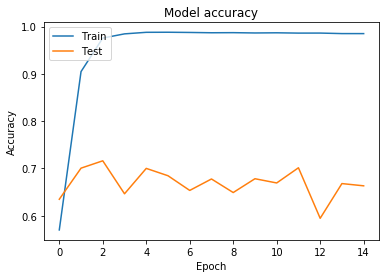

In [28]:
plt.plot(historyE.history['accuracy'])
plt.plot(historyE.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

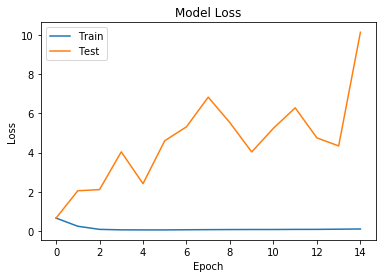

In [29]:
plt.plot(historyE.history['loss'])
plt.plot(historyE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
tf.__version__

'2.2.0'

In [23]:
X_train.shape[0]//batch_size

19

In [30]:
right_images.shape

(383, 128, 128)